## Hypothesis Testing with Insurance Data

### Author:  Sheneka Allen

In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hypothesis testing lib
import scipy.stats as stats

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
data_df = pd.read_csv(url)
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Q1. Do smokers have higher insurance charges than non-smokers?

In [5]:
## Filtering out smokers and non-smokers to separate variables
data_df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

In [7]:
# Explore mean values for features
smoker_mean = data_df.groupby('smoker')['charges'].mean()
smoker_mean

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [8]:
# Define feature of interest
smokers_charges = smokers_df['charges']
non_smokers_charges = non_smokers_df['charges']

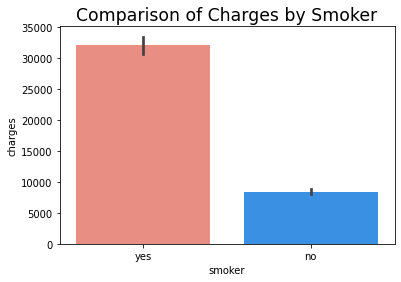

In [9]:
## Barplot
smoker_palette={'yes':'salmon', "no":'dodgerblue'}
sns.barplot(data=data_df, x='smoker',y='charges',palette=smoker_palette)
plt.title('Comparison of Charges by Smoker',fontsize='xx-large');

In [10]:
# 1 - Q1 Null Hypothesis and Alternative Hypothesis

## Null: Insurance charges for smokers are NOT higher than insurance charges for non-smokers.
## Alternative Hypothesis:  Smokers have significantly higher insurance charges than non-smokers.

## Select "2-Sample Test" - 2 Sample Groups

### No significant outliers

### Normality

### Equal Variance

In [11]:
# Test the assumptions of your selected test

## 2a - Check for outliers in charges for smoker group
zscores= stats.zscore(smokers_charges)
smokers_outliers = abs(zscores)>3
np.sum(smokers_outliers)

## alternate code
#smokers_outliers = np.abs(stats.zscore(smokers_charges)) > 3
#smokers_outliers.sum()

0

In [12]:
## 2b - Check for outliers in charges for non-smoker group
zscores= stats.zscore(non_smokers_charges)
non_smokers_outliers = abs(zscores)>3
np.sum(non_smokers_outliers)

## alternate code
#non_smokers_outliers = np.abs(stats.zscore(non_smokers_charges)) > 3
#non_smokers_outliers.sum()

24

In [13]:
# 2c - Remove outliers from non-smokers group
non_smokers_charges = non_smokers_charges.loc[~non_smokers_outliers]

In [14]:
# 3a - Check smoker group for normality
result = stats.normaltest(smokers_charges)
print(result)
result.pvalue < 0.5

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [15]:
# reconfirm size of smokers group
len(smokers_charges)

274

In [16]:
# 3b - Check non-smoker group for normality
result = stats.normaltest(non_smokers_charges)
print(result)
result.pvalue < .05

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


True

In [17]:
# reconfirm size of non-smokers group
len(non_smokers_charges)

1040

#### NOT normally distributed, but can safely disregard normality test results since n >15

In [18]:
# 4 - Check for equal variance

result = stats.levene(smokers_charges, non_smokers_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

#### Does NOT look like distribution has equal variances so need to run Welch's t-test

In [19]:
# 5 - Run alternative test:  Welch's t-test with equal_var = False
result = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

## Interpretation of Q1 Test Results:

### p_value < alpha (0.05), so I reject the null hypothesis and accept that there is a significant difference between the insurance charges of smokers and non-smokers.

## Q2. Are men more likely to smoke than women?


> This is a categorical target, testing group membership across categories


In [21]:
# 1 - Q2 Null Hypothesis and Alternative Hypothesis

## Null: There is no relationship between Sex and if someone smokes or not. 
## Alternative Hypothesis:  A person's Sex significantly influences if they smoke or not.

In [23]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


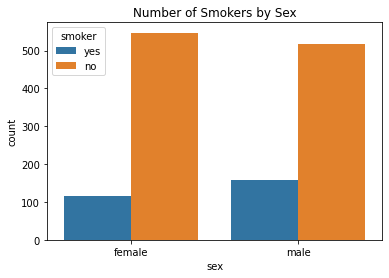

In [26]:
# visualize smokers by sex
ax = sns.countplot(data=data_df, x='sex',hue='smoker')
ax.set_title("Number of Smokers by Sex");

## Select Chi-squared (x^2) Test

### There are two categorical variables (ordinal or nominal)

### The outcomes are independent

In [29]:
## 2 - calculate the contingency table with pd.crosstab
# Need to know how many observations from each group variable (sex) 
# fell into which category in the target (smokers)

table = pd.crosstab(data_df['sex'], data_df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [30]:
# 3 - Execute the selected test

result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results


In [31]:
# 4 - Interpret your p-value and reject or fail to reject your null hypothesis
print(p)
p<.05

0.006548143503580696


True

## Interpretation of Q2 Test Results:

### p_value < alpha (0.05), so I reject the null hypothesis and accept that there is a significant difference between Sex of smokers.

## Q3. Do different regions have different charges, on average?

In [22]:
# State your Null Hypothesis and Alternative Hypothesis

# -Select the correct test according to the data type and number of samples

# -Test the assumptions of your selected test.

# -Execute the selected test, or the alternative test (if you do not meet the assumptions)

# -Interpret your p-value and reject or fail to reject your null hypothesis

# -Show a supporting visualization that helps display the result

In [32]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
# Explore average charges by region
region_charges_mean = data_df.groupby('region')['charges'].mean()
region_charges_mean

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

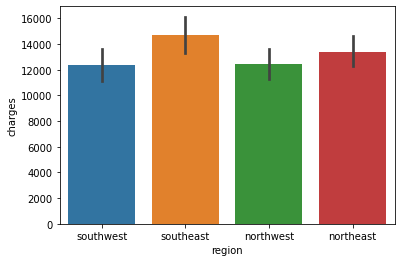

In [39]:
# visualize average charges by region
sns.barplot(data=data_df, x='region',y='charges');

In [ ]:
# 1 - Null Hypothesis and Alternative Hypothesis

# Null Hypothesis:  Different regions all have the same average charges. 
# (the average charges are not significantly different between regions)

# Alternative Hypothesis: Different regions have significantly different average charges. 
# (the average charges are significantly different between regions)

## n > 2 so must use ANOVA Test

### Normality

### Equal variance

### No significant outliers

In [42]:
# 2 - Separate features data into groups

## Create a groups dictionary for these 4 groups

groups = {}
## Loop through all unique categories
for i in data_df['region'].unique():
    ## Get series for group and rename
    data = data_df.loc[data_df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [44]:
# 3a - check for Normality

## Running normal test on each group and confirming n > 15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T # .T - transposes index and columns
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [45]:
### 3b - checking significance with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


#### NOT normally distributed, but can safely disregard normality test results since n >15

In [46]:
# 4 - check for equal variance using * operator for groups dictionary values
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

#### Did not meet the equal variance test, p < .05, so must run the Kruskal-Wallis Test instead of ANOVA

In [47]:
# 5 - Run Alternate Test:  Kruskal-Wallis 

result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

## Interpretation of Q3 Test Results

### Kruskal-Wallis returned a single p_value > .05  representing randomness between ALL groups, so I 'fail to reject' or accept the null hypothesis